<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Prophet-Description" data-toc-modified-id="Prophet-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prophet Description</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation Metric</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Modelling:-prophet" data-toc-modified-id="Modelling:-prophet-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Modelling: prophet</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-with-two-columns:-ds-and-y" data-toc-modified-id="Create-dataframe-with-two-columns:-ds-and-y-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Create dataframe with two columns: ds and y</a></span></li><li><span><a href="#model1:-default-parameters" data-toc-modified-id="model1:-default-parameters-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>model1: default parameters</a></span></li><li><span><a href="#Model2:-saturation-cap-and-floor" data-toc-modified-id="Model2:-saturation-cap-and-floor-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Model2: saturation cap and floor</a></span></li><li><span><a href="#Model3:-Seasonality" data-toc-modified-id="Model3:-Seasonality-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Model3: Seasonality</a></span></li><li><span><a href="#Plotly-Visualizations-for-prophet" data-toc-modified-id="Plotly-Visualizations-for-prophet-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Plotly Visualizations for prophet</a></span></li><li><span><a href="#SMAPE-predictions" data-toc-modified-id="SMAPE-predictions-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>SMAPE predictions</a></span></li><li><span><a href="#Prophet-Cross-validations" data-toc-modified-id="Prophet-Cross-validations-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Prophet Cross validations</a></span></li></ul></li></ul></div>

# Data Description

Reference: https://www.kaggle.com/c/web-traffic-time-series-forecasting/data

```
Original data: train_1.csv
-----------------------------
rows = 145,063
columns = 551
first column = Page
date columns = 2015-07-01, 2015-07-02, ..., 2016-12-31 (550 columns)
file size: 284.6 MB


            
              
Data for modelling: 
--------------------------------------------------------------------
Timeseries   : Now You See Me es (Spain, random_state=42)

For ARIMA    : we have only one timeseries (one column)
For sklearn  : For linear regressor, ensember learners we can have many columns
For fbprophet: we have only dataframe with columns ds and y (additional cap and floor)
```

# Prophet Description

References:
- https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/
- https://www.kaggle.com/rpbenatti/dh-desafio-4-benatti
- https://www.kaggle.com/conorm97/prediction-using-prophet-with-us-holidays
- https://www.kaggle.com/springrid/prediction-prophet-movingavg-and-apple-vs-facebook
- https://www.kaggle.com/cpmpml/smape-weirdness


We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:

$$
y(t)=g(t)+s(t)+h(t)+\epsilon_{t}
$$

- g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series
- s(t): periodic changes (e.g. weekly/yearly seasonality)
- h(t): effects of holidays (user provided) with irregular schedules
- εt: error term accounts for any unusual changes not accommodated by the model


Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. 

Modeling seasonality as an additive component is the same approach taken by exponential smoothing in [Holt-Winters technique](https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/) . 

We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.


Trend parameters:


|Parameter  |Description  |
| :---| ---: |
| growth | linear’ or ‘logistic’ to specify a linear or logistic trend |
| changepoints | List of dates at which to include potential changepoints (automatic if not specified) |
| n_changepoints | If changepoints in not supplied, you may provide the number of changepoints to be automatically included |
| changepoint_prior_scale | Parameter for changing flexibility of automatic changepoint selection |

Seasonality & Holiday Parameters:

| Parameter | Description |
| :---|:---|
| yearly_seasonality | Fit yearly seasonality |
| weekly_seasonality | Fit weekly seasonality |
| daily_seasonality | Fit daily seasonality |
| holidays | Feed dataframe containing holiday name and date |
| seasonality_prior_scale | Parameter for changing strength of seasonality model |
| holiday_prior_scale | Parameter for changing strength of holiday model |


# Evaluation Metric

The formula for SMAPE (Symmetric Mean Absolute Percentage Error) is given below:  

$$
S M A P E=\frac{100 \%}{n} \sum_{t=1}^{n} \frac{\left|F_{t}-A_{t}\right|}{\left(\left|A_{t}\right|+\left|F_{t}\right|\right) / 2}
$$

Where, F is forecast and A is the actual value of time series at given time t.

Python implementation:
```python
def smape(A, F):
    F = A[:len(A)]
    return ( 200.0/len(A) * np.sum(  np.abs(F - A) / 
                                  (np.abs(A) + np.abs(F) + np.finfo(float).eps))
           )
```

Despite the name Symmetric, the smape is not actually symmetric. Take this
example from [wikipedia](https://www.wikiwand.com/en/Symmetric_mean_absolute_percentage_error) for an example:

The SMAPE is not symmetric since over- and under-forecasts are not treated equally. 
This is illustrated by the following example by applying the SMAPE formula:

```
Over-forecasting: At = 100 and Ft = 110 give SMAPE = 4.76%
Under-forecasting: At = 100 and Ft = 90 give SMAPE = 5.26%.
```

# Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import os
import time

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

# random state
SEED=100
np.random.seed(SEED)

#============= pandas settings
# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
np.set_printoptions(precision=3)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

#========== ipython
import IPython
from IPython.display import display, HTML, Image, Markdown

# sklearn
import sklearn
from sklearn.preprocessing import StandardScaler

# timeseries
from datetime import date
import holidays

# prophet
import fbprophet
from fbprophet import Prophet
pd.plotting.register_matplotlib_converters() # prophet needs this
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly
from fbprophet.diagnostics import cross_validation

# plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls
from plotly.tools import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=False)

# versions
import watermark
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2020-10-14 

CPython 3.7.9
IPython 7.18.1

compiler   : Clang 10.0.0 
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

matplotlib 3.1.3
sklearn    0.22.1
pandas     1.1.1
plotly     4.11.0
holidays   0.10.3
json       2.0.9
watermark  2.0.2
seaborn    0.11.0
IPython    7.18.1
numpy      1.19.1
fbprophet  0.7.1



In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Useful Scripts

In [4]:
import sys
sys.path.append('../models')

import util_prophet
from util_prophet import get_mape, get_smape, get_ts_eval
from util_prophet import plot_actual_forecast_plotly, plot_deltas_plotly

df_eval = None

# Load the data

In [5]:
%%time

df = pd.read_csv('../data/train_1.csv.zip',compression='zip')
cond = df['Page'] == "Prince_(musician)_en.wikipedia.org_all-access_all-agents"
df = df.loc[cond]

df = df.filter(regex="Page|2016")
df = df.melt(id_vars=['Page'],var_name='ds',value_name='y').drop('Page',axis=1)
df['ds'] = pd.to_datetime(df['ds'])

print(df.shape)
df.head()

(366, 2)
CPU times: user 8.91 s, sys: 779 ms, total: 9.69 s
Wall time: 9.93 s


ds        y
0 2016-01-01  20947.0
1 2016-01-02  19466.0
2 2016-01-03   8587.0
3 2016-01-04   7386.0
4 2016-01-05   7719.0

# Data Preprocessing

In [6]:
ts = df.set_index('ds')['y']
print(type(ts))
ts.head()

<class 'pandas.core.series.Series'>


ds
2016-01-01    20947.0
2016-01-02    19466.0
2016-01-03     8587.0
2016-01-04     7386.0
2016-01-05     7719.0
Name: y, dtype: float64

In [7]:
pd.plotting.register_matplotlib_converters() # prophet needs this
# ts.plot()

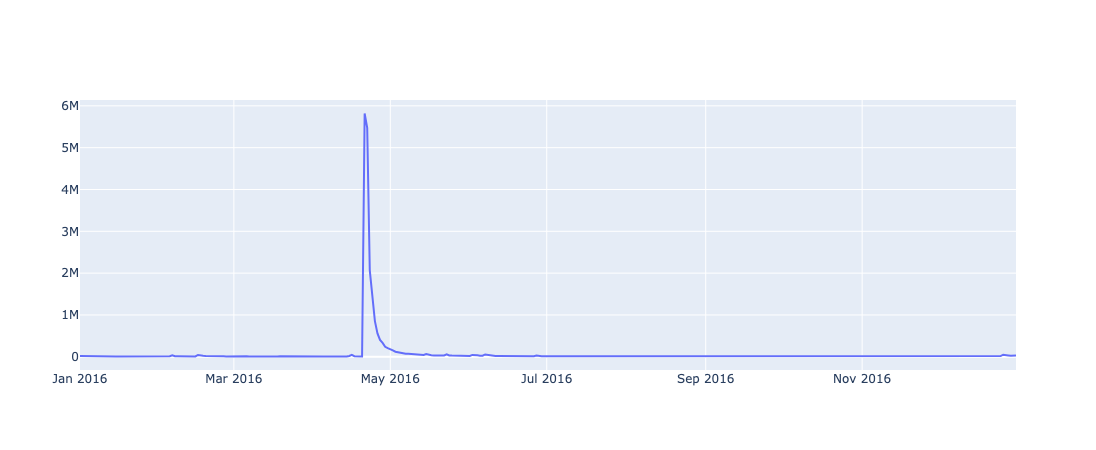

In [8]:
iplot([{'x': ts.index,'y': ts.to_numpy()} ])

# Modelling: prophet

In [130]:
df_eval = None

## Create dataframe with two columns: ds and y

In [131]:
# prophet expects two columns: ds and y
df1 = df

print(df1.dtypes)
df1.head()

ds    datetime64[ns]
y            float64
dtype: object


ds        y
0 2016-01-01  20947.0
1 2016-01-02  19466.0
2 2016-01-03   8587.0
3 2016-01-04   7386.0
4 2016-01-05   7719.0

## model1: default parameters

In [132]:
m1 = Prophet()
m1.fit(df1);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [133]:
# future
periods = 30

# after fitting model, we can create future dataframe
# which has no data but only next N periods index
future1 = m1.make_future_dataframe(periods=periods)

print('num periods  : {}'.format(periods))
print(f'df1 shape     : {df1.shape}')
print(f'future shape : {future1.shape}')

future1.head().append(future1.tail())

num periods  : 30
df1 shape     : (366, 2)
future shape : (396, 1)


ds
0   2016-01-01
1   2016-01-02
2   2016-01-03
3   2016-01-04
4   2016-01-05
391 2017-01-26
392 2017-01-27
393 2017-01-28
394 2017-01-29
395 2017-01-30

In [134]:
# forecast
forecast1 = m1.predict(future1)

print(f'df       shape : {df.shape}')
print(f'periods        : {periods}')
print(f'future1  shape : {future1.shape}')
print(f'forecast shape : {forecast1.shape}')
forecast1.head(2).T

df       shape : (366, 2)
periods        : 30
future1  shape : (396, 1)
forecast shape : (439, 16)


0                    1
ds                          2016-01-01 00:00:00  2016-01-02 00:00:00
trend                                   18809.1              19943.7
yhat_lower                              -493065              -510895
yhat_upper                               637866               577393
trend_lower                             18809.1              19943.7
trend_upper                             18809.1              19943.7
additive_terms                          60221.7             -3992.76
additive_terms_lower                    60221.7             -3992.76
additive_terms_upper                    60221.7             -3992.76
weekly                                  60221.7             -3992.76
weekly_lower                            60221.7             -3992.76
weekly_upper                            60221.7             -3992.76
multiplicative_terms                          0                    0
multiplicative_terms_lower                    0                    0
multiplicative_terms_upper                    0                    0
yhat                                    79030.8              15950.9

In [135]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(2)

ds           yhat     yhat_lower     yhat_upper
437 2017-03-13 -125558.009363 -658134.726322  447424.699972
438 2017-03-14 -133305.169471 -709927.768389  394742.582324

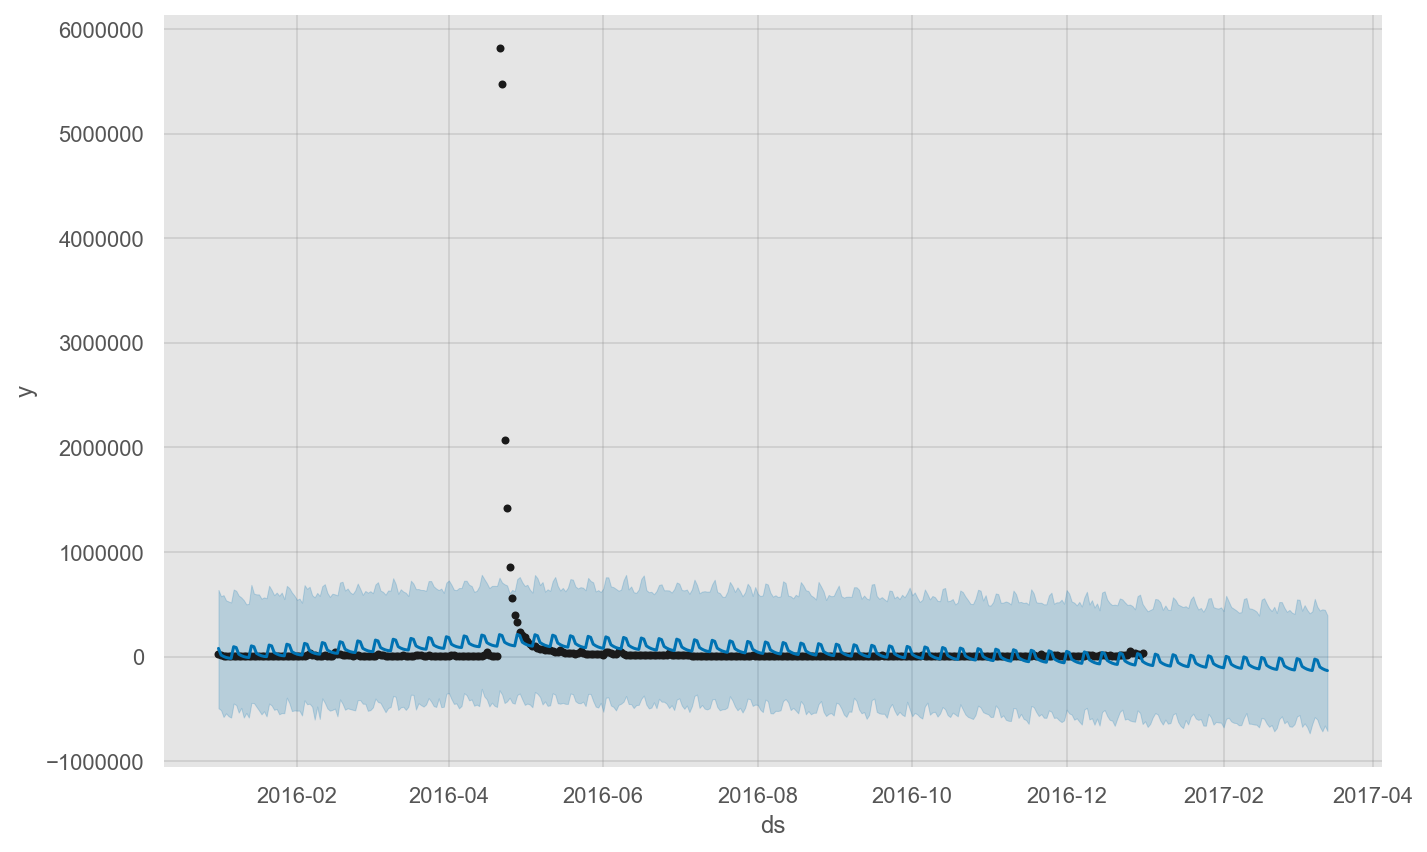

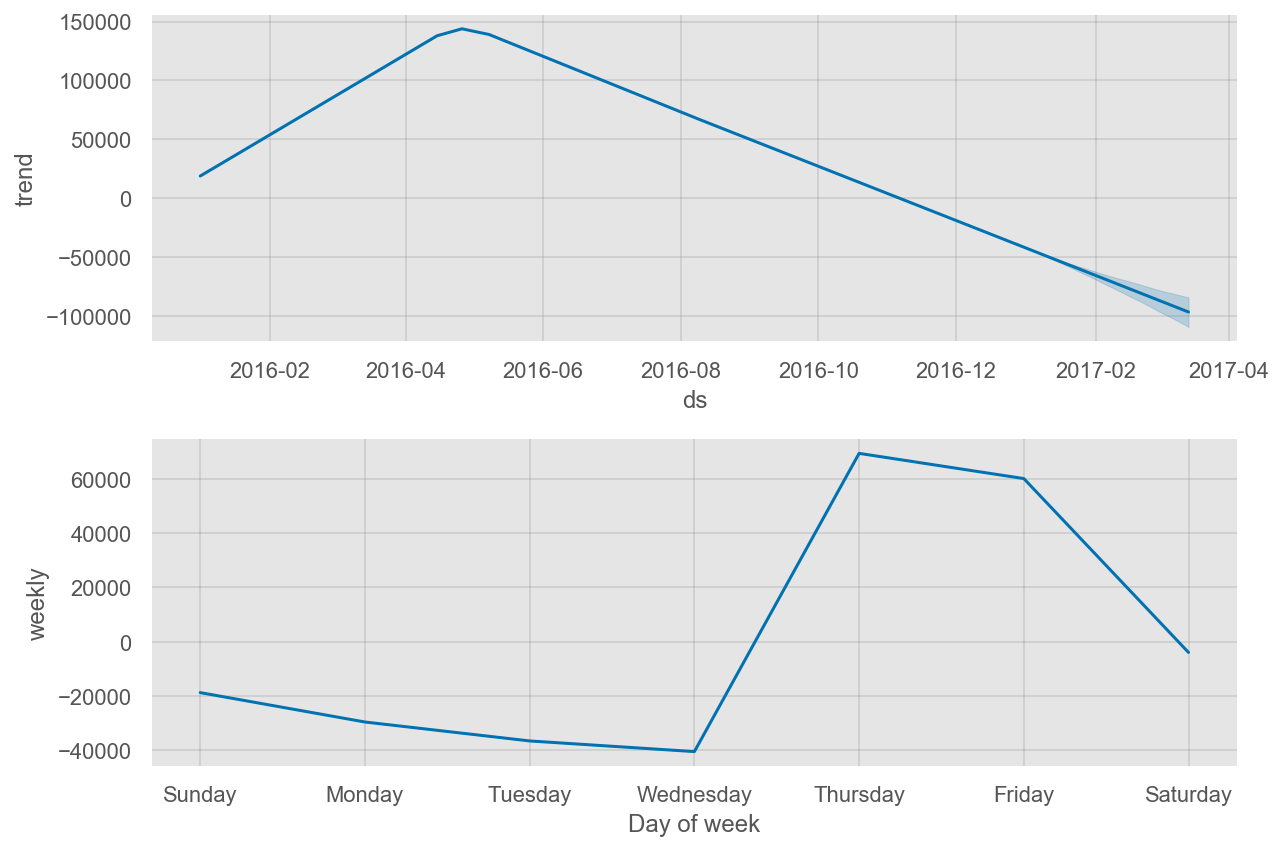

In [136]:
fig1 = m1.plot(forecast1)
fig2 = m1.plot_components(forecast1)

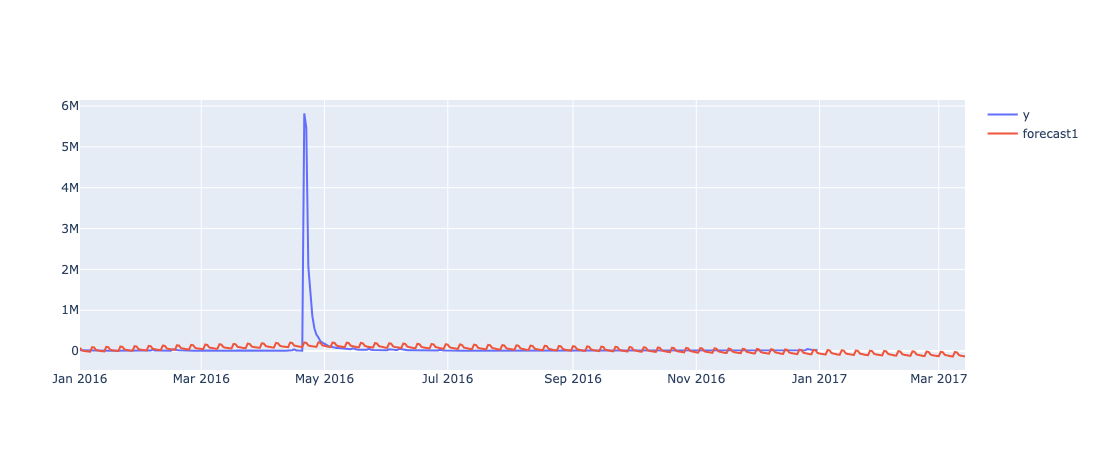

In [137]:
plot_actual_forecast_plotly(df1, ['forecast1'],[forecast1])

In [138]:
# observation: this prediction only captures the trend
# problem    : the trend is going down and predicts negative values
#
# attempt:
# use cap and floor

In [139]:
num_preds = int(0.2*len(df))
N = len(df)
num_preds

73

In [140]:
ytest = df1[['y']].iloc[N-num_preds:N].to_numpy().ravel()
ypreds = forecast1[['yhat']].iloc[N-num_preds:N].to_numpy().ravel()

print(ytest.shape, ypreds.shape)
print(ytest[-5:],ypreds[-5:])

model_name = 'fbprophet'
desc = 'default'
df_eval = get_ts_eval(model_name, desc, ytest,ypreds,
                    df_eval=df_eval,show=True)

(73,) (73,)
[34560. 31090. 22827. 19956. 31446.] [-75230.577 -79920.429  29455.144  19393.979 -45574.696]


In [141]:
ypreds.min(), ypreds.max()

(-79920.42871391447, 82250.22810524894)

## Model2: saturation cap and floor

In [142]:
df1['y'].describe()

# median is about 10k

count    3.660000e+02
mean     6.261184e+04
std      4.388072e+05
min      6.634000e+03
25%      8.114500e+03
50%      9.642500e+03
75%      1.403350e+04
max      5.816910e+06
Name: y, dtype: float64

In [143]:
future1.head(2)

ds
0 2016-01-01
1 2016-01-02

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


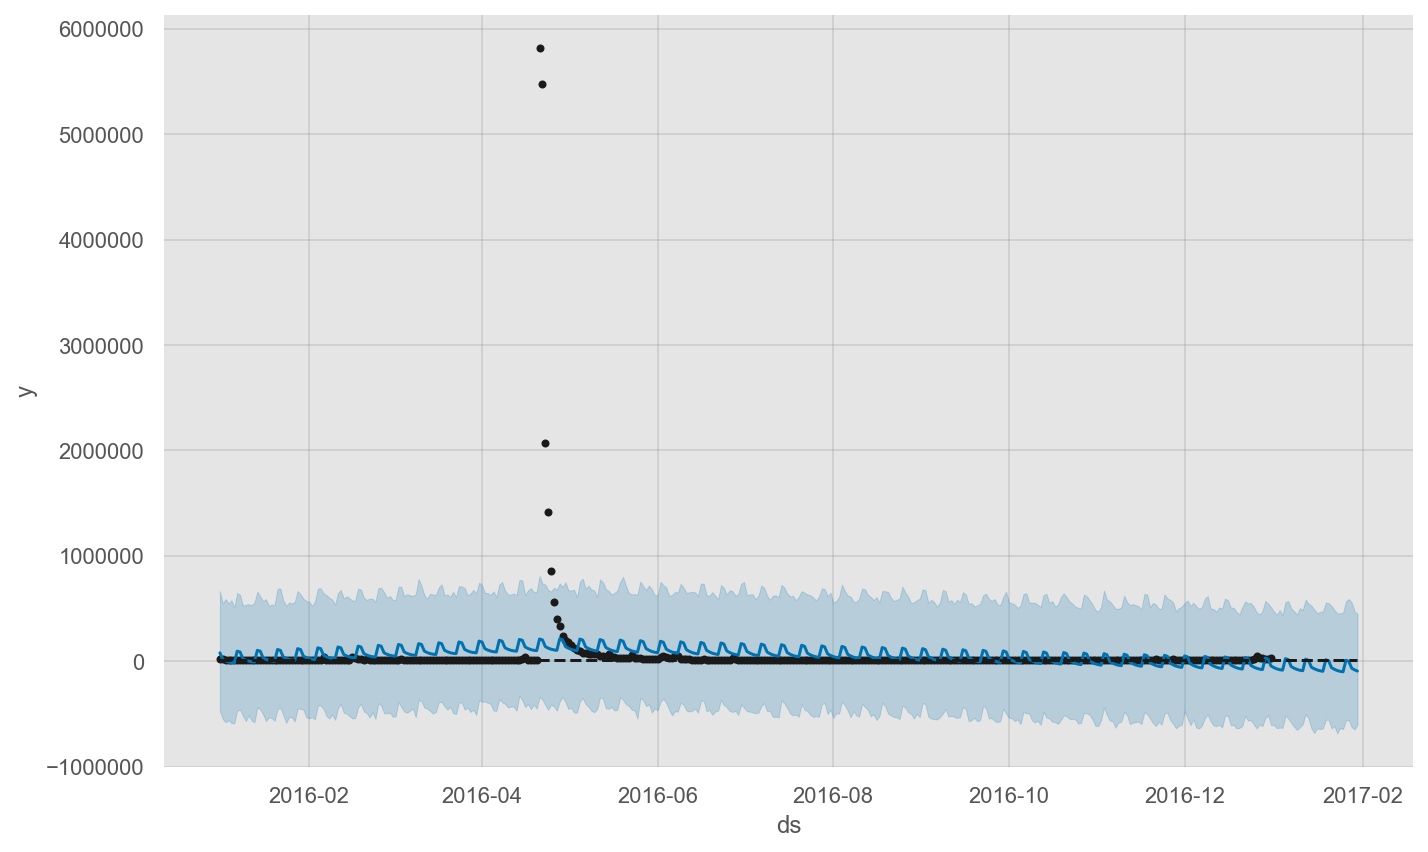

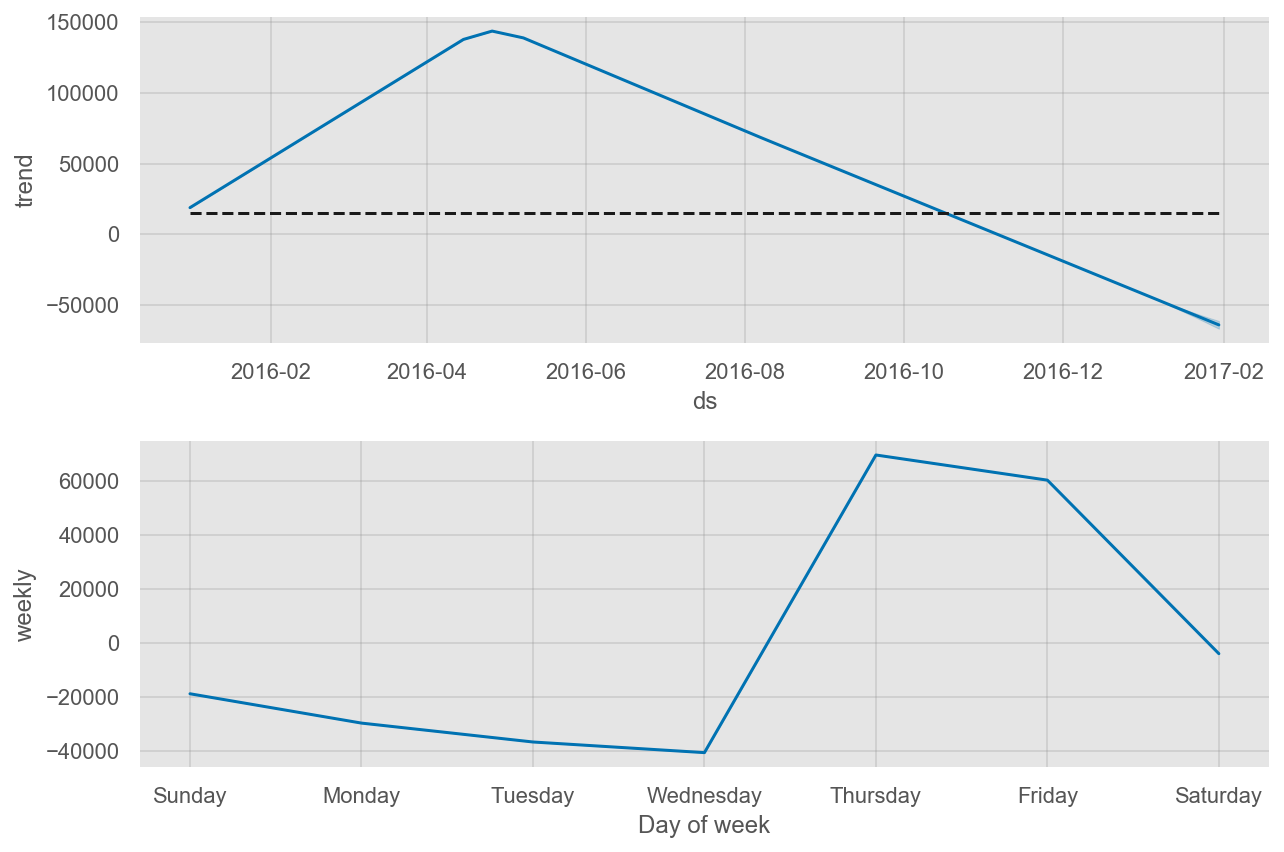

In [144]:
# set cap and floor 
df2 = df1.copy()
CAP = 15_000
df2['cap'] = CAP
df2['floor'] = CAP

# future
future2 = future1.copy()
future2['cap'] = CAP
future2['floor'] = CAP

# model
m2 = Prophet(growth='linear')
forecast2 = m2.fit(df2).predict(future2)

# plots
fig1 = m2.plot(forecast2)
fig2 = m2.plot_components(forecast2)

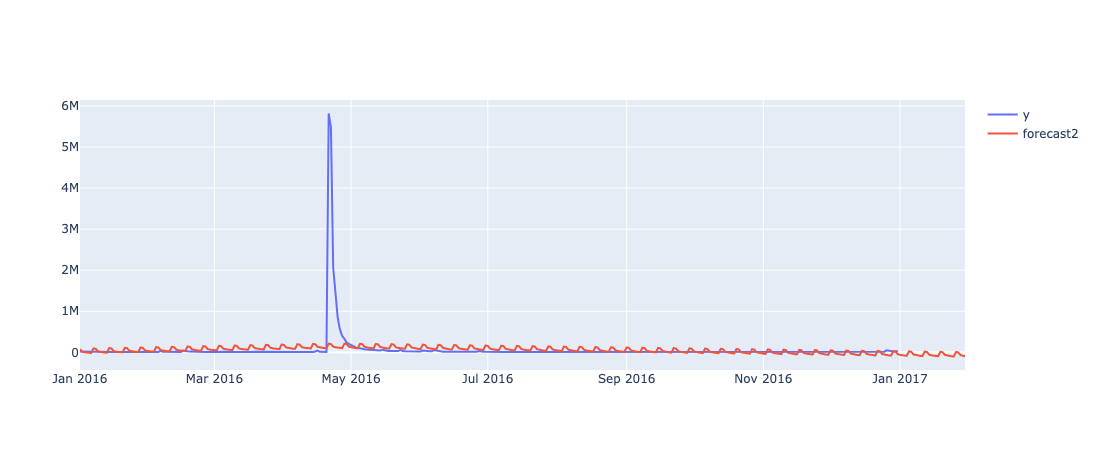

In [145]:
plot_actual_forecast_plotly(df2, ['forecast2'],[forecast2])

In [146]:
# still I can see values below 0, there can not be views less than 0.
forecast2.head(2)

ds         trend    cap     yhat_lower     yhat_upper   trend_lower  \
0 2016-01-01  18809.132427  15000 -473906.873249  662825.203872  18809.132427   
1 2016-01-02  19943.708331  15000 -548929.320413  546276.650624  19943.708331   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  18809.132427    60221.698194          60221.698194          60221.698194   
1  19943.708331    -3992.761624          -3992.761624          -3992.761624   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0  60221.698194  60221.698194  60221.698194                   0.0   
1  -3992.761624  -3992.761624  -3992.761624                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  79030.830621  
1                         0.0                         0.0  15950.946707

In [147]:
forecast2['yhat'].min(), forecast2['yhat'].max()

(-101038.4623935408, 212563.7355229822)

In [148]:
ytest = df1[['y']].iloc[N-num_preds:N].to_numpy().ravel()
ypreds = forecast1[['yhat']].iloc[N-num_preds:N].to_numpy().ravel()

model_name = 'fbprophet'
desc = 'before_cap_floor'
df_eval = get_ts_eval(model_name, desc, ytest,ypreds,
                    df_eval=df_eval,show=True)

In [155]:
forecast2.head(2).append(forecast2.tail(2)).iloc[:, [0,1,2,3,4,-1]]

ds         trend    cap     yhat_lower     yhat_upper  \
0   2016-01-01  18809.132427  15000 -473906.873249  662825.203872   
1   2016-01-02  19943.708331  15000 -548929.320413  546276.650624   
394 2017-01-29 -63454.183850  15000 -646303.113643  473247.626759   
395 2017-01-30 -64208.399339  15000 -603055.092863  449014.188917   

             yhat  
0    79030.830621  
1    15950.946707  
394 -82272.563906  
395 -93880.958844

In [156]:
forecast2.yhat.describe()

count       396.000000
mean      53746.447795
std       72551.923444
min     -101038.462394
25%        3308.088230
50%       55510.114209
75%      103260.752980
max      212563.735523
Name: yhat, dtype: float64

In [157]:
forecast2['yhat'].clip(0,CAP).describe()

count      396.000000
mean     10987.670455
std       6455.905153
min          0.000000
25%       3308.088230
50%      15000.000000
75%      15000.000000
max      15000.000000
Name: yhat, dtype: float64

In [162]:
# forecast2_copy = forecast2.copy()

In [161]:
forecast2['yhat'] = forecast2['yhat'].clip(0,CAP).to_numpy().ravel()

forecast2.yhat.describe()

count      396.000000
mean     10987.670455
std       6455.905153
min          0.000000
25%       3308.088230
50%      15000.000000
75%      15000.000000
max      15000.000000
Name: yhat, dtype: float64

In [163]:
ytest = df1[['y']].iloc[N-num_preds:N].to_numpy().ravel()
ypreds = forecast2[['yhat']].iloc[N-num_preds:N].to_numpy().ravel()

model_name = 'fbprophet'
desc = 'after_cap_floor'
df_eval = get_ts_eval(model_name, desc, ytest,ypreds,
                    df_eval=df_eval,show=True)

In [164]:
# observation: we improve smape
# problem    : we need to capture the seasonality
#
# attempt:
# use cap and floor

## Model3: Seasonality

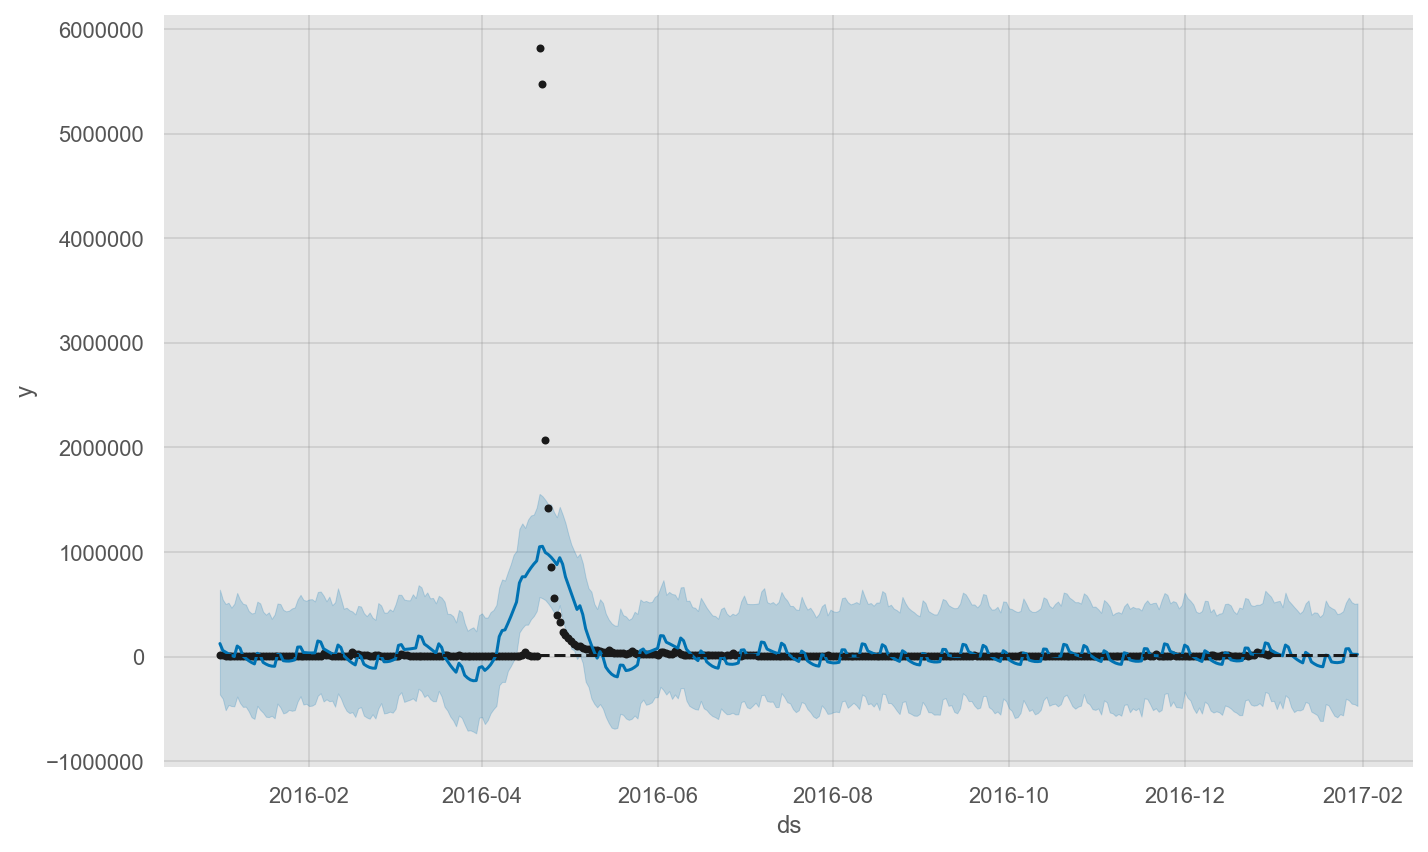

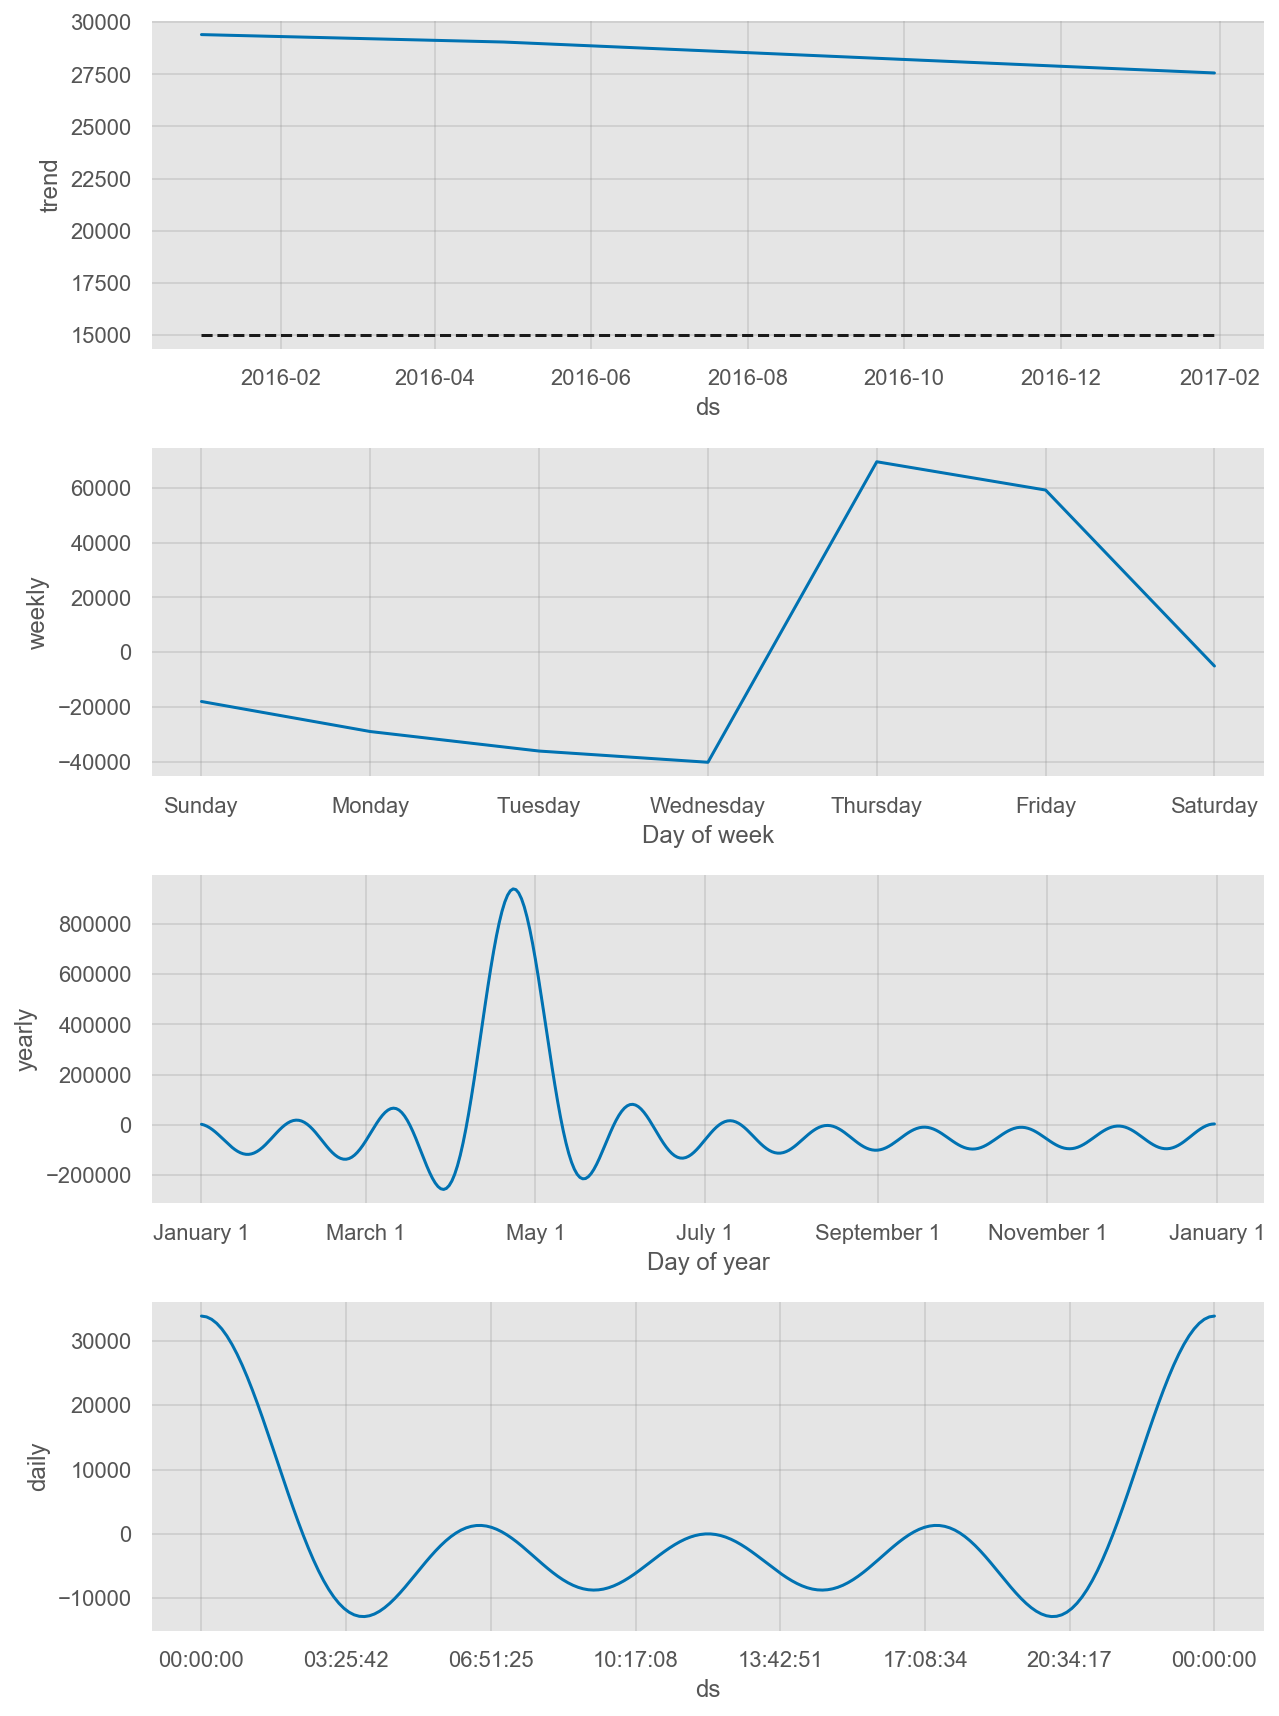

In [165]:
# keep default growth='linear'
# future2 has cap and floor

m3 = Prophet(growth='linear',
            daily_seasonality=True,
            weekly_seasonality=True,
            yearly_seasonality=True)

forecast3 = m3.fit(df2).predict(future2)

fig1 = m3.plot(forecast3)
fig2 = m3.plot_components(forecast3)

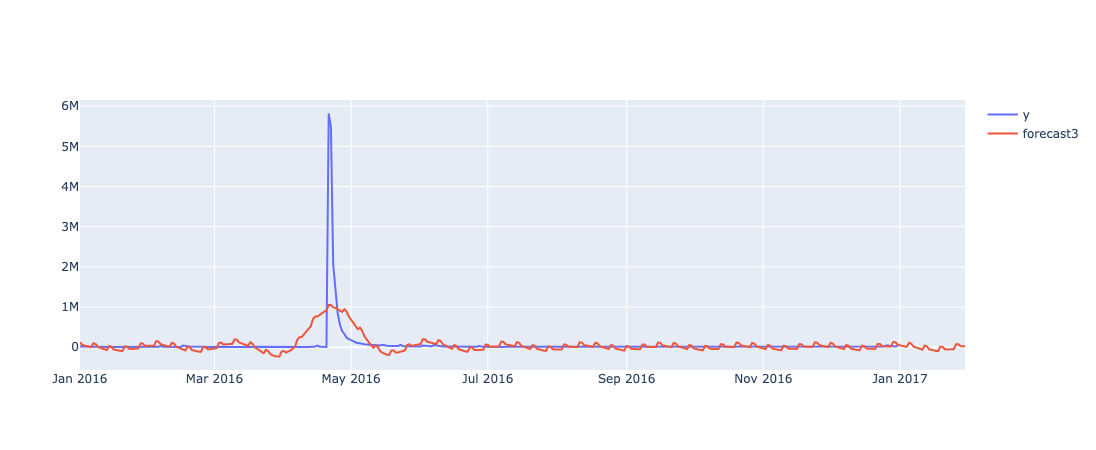

In [166]:
plot_actual_forecast_plotly(df2, ['forecast3'],[forecast3])

In [167]:
ytest = df1[['y']].iloc[N-num_preds:N].to_numpy().ravel()
ypreds = forecast3[['yhat']].iloc[N-num_preds:N].to_numpy().ravel()

model_name = 'fbprophet'
desc = 'seasonality_before_cap_floor'
df_eval = get_ts_eval(model_name, desc, ytest,ypreds,
                    df_eval=df_eval,show=True)

In [168]:
forecast3['yhat'] = forecast3['yhat'].clip(0,CAP).to_numpy().ravel()

ytest = df1[['y']].iloc[N-num_preds:N].to_numpy().ravel()
ypreds = forecast3[['yhat']].iloc[N-num_preds:N].to_numpy().ravel()

model_name = 'fbprophet'
desc = 'seasonality_after_cap_floor'
df_eval = get_ts_eval(model_name, desc, ytest,ypreds,
                    df_eval=df_eval,show=True)

## Plotly Visualizations for prophet

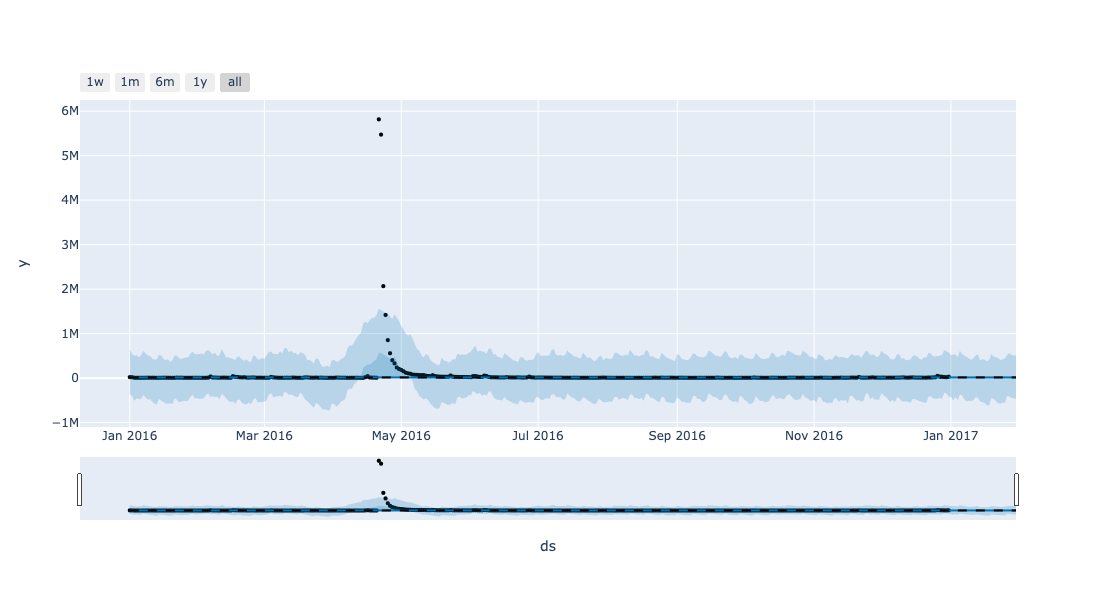

In [180]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m3, forecast3)
py.iplot(fig)